In [1]:
# Notebook library imports

import pandas as pd
import numpy as np

In [2]:
# %load get_data.py
def get_data() :
    
    import pandas as pd
    
    csv_beer = pd.read_csv("/home/grimoire/Projects/BeerRatings/beer_reviews.csv")
    beer_ratings = pd.DataFrame(csv_beer)
    
    return beer_ratings


In [3]:
beer_ratings = get_data()

In [4]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [5]:
len(beer_ratings.brewery_name.unique())

5743

In [6]:
len(beer_ratings.review_profilename.unique())

33388

In [7]:
len(beer_ratings.beer_style.unique())

104

In [13]:
beer_ratings.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [16]:
beer_ratings[beer_ratings.beer_abv >= 50]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
12919,6513,Schorschbräu,1316780901,4.0,4.0,4.0,kappldav123,Eisbock,4.0,3.5,Schorschbräu Schorschbock 57%,57.7,73368


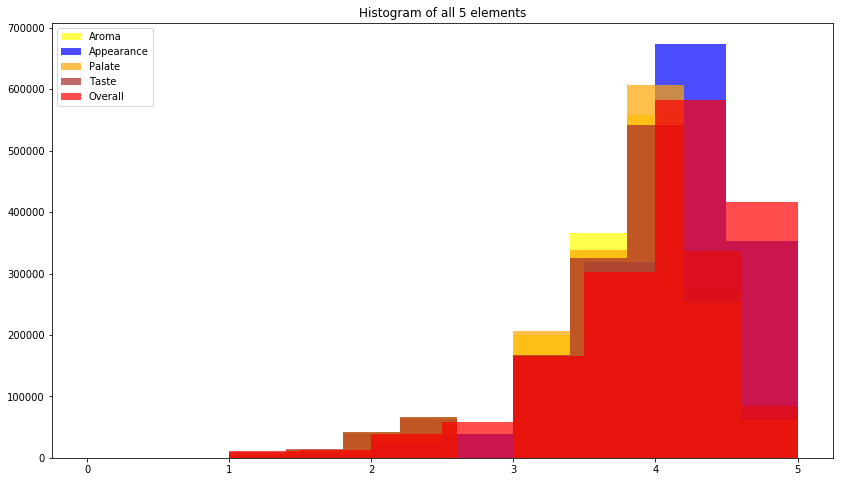

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=[14,8])

plt.hist(beer_ratings.review_aroma.values, alpha=.7, color='yellow', label='Aroma')
plt.hist(beer_ratings.review_appearance.values, alpha=.7, color='blue', label='Appearance')
plt.hist(beer_ratings.review_palate.values, alpha=.7, color='orange', label='Palate')
plt.hist(beer_ratings.review_taste.values, alpha=.7, color='brown', label='Taste')
plt.hist(beer_ratings.review_overall.values, alpha=.7, color='red', label='Overall')

plt.title('Histogram of all 5 elements')
plt.legend(loc=2)

plt.show()

In [9]:
plt.plot()